In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('data2.csv')

df.head()

,x,y
0,1,1
1,3,2
2,9,1
3,3,7
4,7,2


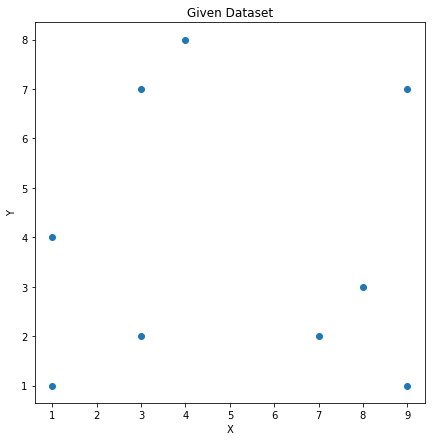

In [3]:
plt.figure(figsize=(7, 7))

plt.scatter(df['x'], df['y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Given Dataset')
plt.show()

In [4]:
X = df.values

In [5]:
Z1 = linkage(X, method='single')
Z2 = linkage(X, method='complete')
Z3 = linkage(X, method='average')
Z4 = linkage(X, method='ward')

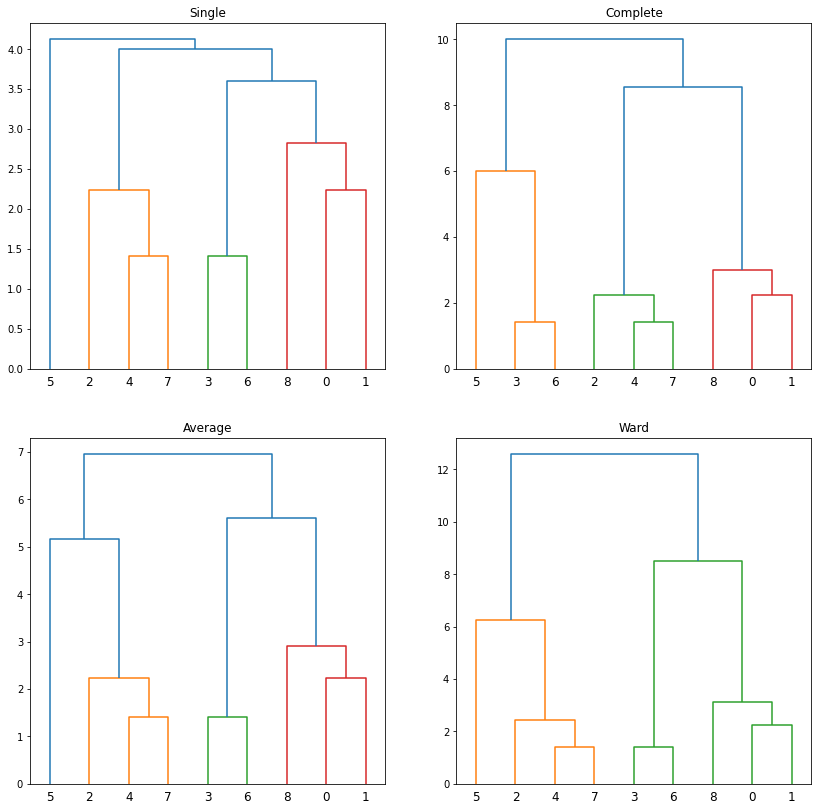

In [6]:
plt.figure(figsize=(14, 14))
plt.subplot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.subplot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z3), plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z4), plt.title('Ward')
plt.show()

In [7]:
from scipy.cluster.hierarchy import fcluster

f1 = fcluster(Z4, 2, criterion='maxclust')

print(f"Clusters: {f1}")

Clusters: [2 2 1 2 1 1 2 1 2]


In [8]:
Z1 = AgglomerativeClustering(n_clusters=2, linkage='ward')

Z1.fit_predict(X)

print(Z1.labels_)

[0 0 1 0 1 1 0 1 0]


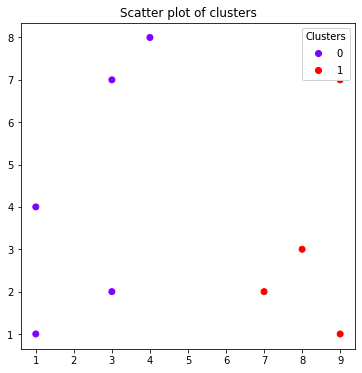

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X[:,0], X[:,1], c=Z1.labels_, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()